# 연관도 분석

In [57]:
import sys
from urllib.parse import quote
import pandas as pd
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from collections import Counter
from konlpy.tag import Okt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import seaborn as sns
import matplotlib.font_manager as fm


plt.rc("font", family="Malgun Gothic")
#plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)  #-폰트 깨지는 문제 해결



def title_info(res_body):
    ### 기본정보를 가져오는 함수
    items = res_body['items']
    cnt = 0
    for item in items:
        cnt += 1
        news_code = cnt

        title = item['title']
        description = item['description']
        #originallink = item['originallink']
        title_list.append({'news_code': news_code, 'title': title, 'description': description}) #, 'originallink': originallink

    return title_list

##################################################################################3

encText = '육아 요인'     # 키워드 입력
sNode = 'blog'           # 검색할 사이트

## cafearticle : 카페글
## kin : 지식인
## blog : 블로그
## news : 뉴스

####################################################################################

title_list = []
for i in range(1, 1000, 100):
    url = "https://openapi.naver.com/v1/search/" + sNode + "?query=" + quote(encText)  # xml 결과
    url = url + '&start=' + str(i) + '&display=' + '100'
    headers = {"X-Naver-Client-Id": "Ck6q0uFP1OluaCauWa5j",
               "X-Naver-Client-Secret": "ArhCyVNNv_"}

    res_json = requests.get(url, headers=headers)

    if res_json.status_code == 200:
        res_body = res_json.json()
        #print(res_body)
    else:
        print("Error Code:" + str(res_json.status_code))
        sys.exit(0)


    title_list = title_info(res_body)

    
df1 = pd.DataFrame(title_list)

df1['title'] = df1['title'].str.replace('</b>', '').str.replace('<b>', '').str.replace('&quot;', '"').str.replace('&amp;', '')
df1['description'] = df1['description'].str.replace('</b>', '').str.replace('<b>', '').str.replace('&quot;', '"')

df1.to_csv('./data/' + encText + '_'+sNode+'.csv', index=False, encoding='utf-8')


word_list = ['위해', '통해', '관련', '지난', '대한', '대해', '이번', '최근', '때문', '정도', '정말', '재택근무', '식사',
           '재택', '근무', '시작', '오늘', '요즘', '동안', '다른', '이후', '형태', '계속', '마치', '시간', '배민', '민족',
          '코로나', '백신', '방역', '진자', '접종', '확진', '음식', '주문', '맛집', '메뉴', '포장',
          '입니다', '있는', '있다', '이런', ' 없는', '같아요', '있으니',
          '아니지만', '그런', '있어요', '없고', '많은', '아니다', '아니고',
          '아닌', '아니라', '있는데', '아니', '있습니다', '있어요', '아닙니다',
          '어떻게', '없는', '같은', '인해', '있어', '있지만', '없다', '있으면',
          '그래', '야하는', '없으니', '같아서','입니당','아니죠','어떤','그럼','이럴',
           '없어서','같은데','없었던','많습니다','같다','아니면','안녕하세요',
           '그렇지','없으면','안되서','같고','없을','있던','있답니다','아닌데',
           '없어도','있게','그럴','있어도','아니게','있어야','없어요','있으면서','아닌가',
          '있는데요','있네', '있다고', '있을까', '그러다', '있어서', '당연한', '필요한',
          '있을', '무사히', '있음', '있네요', '어느덧','없는데', '그렇습니다','그런거겠죠',
          '있지요','좋겠습니다','그렇죠','없다는','없었다','그러니','있다는',
          '같습니다','뿐입니다','높은','비슷한','있었지만','그렇고','푸라','없지만','없나',
          '있었는데','있었고','있잖아요','안되는','있었던','가능합니다','가능하다고',
          '있는게','있었지만','있었어요','인해서','없나','그런지','있으며','확실히','있더라구요',
           '있고','반갑습니다','계신','있죠','있거나','가능하다','인하여','있으','인한','안된다고',
           '야할지','있더라고요','있었다','그렇다','있고','없음','이러한','아님','많은','있도록',
          '부탁드립니다','어떠실까','어떨까','없어','같아','어떠신','필요하신', '좋은', '맛있는', '맛있게', '좋아하는',
          '고급스러운','고급스러', '맛있고', '좋을', '있었습니다', '중요한', '설마', '런가','워낙','가게','고민',
            '사진','생각','소개','시장','어플','창업','쿠팡','특급','하나','한번','할인','급식','로비','학원',
            '지도사','저자','출판','발매','수업', '치사']


reword = []
for i in df1['description']:
    okt = Okt()
    pos_text = okt.pos(i)       


    Noun_word = []                              
    for word, pos in pos_text:
        if pos == 'Noun' and len(word) >= 2 and word not in word_list:  # 두 글자 이상이고 불용어 처리한 명사만 추출
            Noun_word.append(word)
        
    reword.append(Noun_word)
    
reword



[['개월',
  '벌써',
  '개월',
  '등원',
  '처음',
  '적응',
  '기간',
  '일주일',
  '간다',
  '주차',
  '교실',
  '가면',
  '어린이집',
  '표정',
  '마음',
  '선생님'],
 ['어린이집',
  '등원',
  '아이',
  '자꾸',
  '어린이집',
  '가기',
  '아이',
  '녹음기',
  '순간',
  '선생님',
  '표정',
  '그날',
  '화가'],
 ['어린이집', '등원', '부모님', '어린이집', '하원', '세상', '표정', '어제', '어린이집', '강당', '체육'],
 ['현재', '임신', '개월차', '내년', '이면', '둘째', '어린이집', '표정', '등원', '질질', '실시간'],
 ['어린이집',
  '가면',
  '아이',
  '성격',
  '사람',
  '화난',
  '표정',
  '고개',
  '동네',
  '또래',
  '동생',
  '과업',
  '또한',
  '시기',
  '유치원',
  '등원'],
 ['문제',
  '어린이집',
  '등원',
  '발인',
  '일찍',
  '장례식',
  '가야',
  '동생',
  '잠시',
  '저희',
  '표정',
  '뻘쭘',
  '무슨',
  '부정',
  '이유',
  '그냥',
  '뻘쭘',
  '상황'],
 ['가정', '어린이집', '보육료', '지원', '표정', '어제', '비낼때', '오전', '등원', '오후', '보육료'],
 ['소변', '연습', '선생님', '표정', '강제', '강제', '경우', '등원', '일이', '반응', '어린이집', '엄마'],
 ['평소', '어린이집', '등원', '하원', '할머니', '퇴근', '아이', '데리', '침대', '표정', '대성통곡'],
 ['표정',
  '가기',
  '고개',
  '지금',
  '아이',
  '아침',
  '유치원',
  '등원',
  '거부',
  '워드',
  '일단',
  '선택',
  '이

In [59]:
te = TransactionEncoder()
te_ary = te.fit(reword).transform(reword)
df_apriori = pd.DataFrame(te_ary, columns=te.columns_)
df_apriori




frequent_itemsets = apriori(df_apriori, min_support=0.2, use_colnames=True)     ######## 지지도 변경
frequent_itemsets





from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=1)
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(선생님),(등원),0.227273,0.954545,0.227273,1.0,1.047619,0.010331,inf
1,(등원),(어린이집),0.954545,1.000000,0.954545,1.0,1.000000,0.000000,inf
2,(선생님),(어린이집),0.227273,1.000000,0.227273,1.0,1.000000,0.000000,inf
3,(아이),(어린이집),0.636364,1.000000,0.636364,1.0,1.000000,0.000000,inf
4,(아침),(어린이집),0.227273,1.000000,0.227273,1.0,1.000000,0.000000,inf
5,(표정),(어린이집),0.954545,1.000000,0.954545,1.0,1.000000,0.000000,inf
6,"(선생님, 어린이집)",(등원),0.227273,0.954545,0.227273,1.0,1.047619,0.010331,inf
7,"(선생님, 등원)",(어린이집),0.227273,1.000000,0.227273,1.0,1.000000,0.000000,inf
8,(선생님),"(등원, 어린이집)",0.227273,0.954545,0.227273,1.0,1.047619,0.010331,inf
9,"(선생님, 표정)",(등원),0.204545,0.954545,0.204545,1.0,1.047619,0.009298,inf


# 워드클라우드

In [5]:
import sys
from urllib.parse import quote
import pandas as pd
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from collections import Counter
from konlpy.tag import Okt
import seaborn as sns
import matplotlib.font_manager as fm


plt.rc("font", family="Malgun Gothic")
#plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)  #-폰트 깨지는 문제 해결



def title_info(res_body):
    ### 기본정보를 가져오는 함수
    items = res_body['items']
    cnt = 0
    for item in items:
        cnt += 1
        news_code = cnt

        title = item['title']
        description = item['description']
        #originallink = item['originallink']
        title_list.append({'news_code': news_code, 'title': title, 'description': description}) #, 'originallink': originallink

    return title_list

##################################################################################3

encText = '육아'     # 키워드 입력
sNode = 'cafearticle'           # 검색할 사이트

## cafearticle : 카페글
## kin : 지식인
## blog : 블로그
## news : 뉴스

####################################################################################

title_list = []
for i in range(1, 1000, 100):
    url = "https://openapi.naver.com/v1/search/"+sNode+"?query=" + quote(encText)  # xml 결과
    url = url + '&start=' + str(i) + '&display=' + '100'
    headers = {"X-Naver-Client-Id": "Ck6q0uFP1OluaCauWa5j",
               "X-Naver-Client-Secret": "ArhCyVNNv_"}

    res_json = requests.get(url, headers=headers)

    if res_json.status_code == 200:
        res_body = res_json.json()
        #print(res_body)
    else:
        print("Error Code:" + str(res_json.status_code))
        sys.exit(0)


    title_list = title_info(res_body)
    
df1 = pd.DataFrame(title_list)

TypeError: 'str' object is not callable

        단어   빈도수
0     육아휴직  3211
1       사용   546
2       기간   451
3       개월   436
4       급여   431
...    ...   ...
1450    날로     1
1451    정근     1
1452    차등     1
1453    혼합     1
1454    추정     1

[1455 rows x 2 columns]


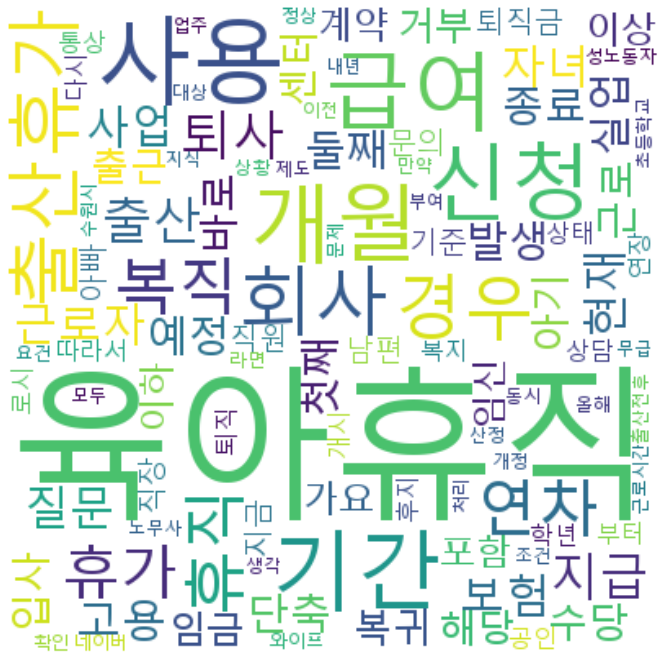

In [3]:
df1['title'] = df1['title'].str.replace('</b>', '').str.replace('<b>', '').str.replace('&quot;', '"').str.replace('&amp;', '')
df1['description'] = df1['description'].str.replace('</b>', '').str.replace('<b>', '').str.replace('&quot;', '"')

df1.to_csv('./data/' + encText + '_'+sNode+'.csv', index=False, encoding='utf-8')

column_f = df1['description']
column_f.to_csv('./data/' + encText + '_'+sNode+'.txt', index=False)         # csv 파일에서 description 열을 추출하여 txt 파일로 저장

f = open('./data/' + encText + '_'+sNode+'.txt', 'r', encoding='utf-8')
texts = f.read()
filtered_texts = texts.replace('.', '').replace(',', '').replace("'", "").replace('·', ' ').replace('"', '').replace('\n', '')
f.close()

okt = Okt()
pos_text = okt.pos(filtered_texts)          # csv 파일을 txt 파일로 변환 후 읽어들여 형태소 분석
#print(pos_text)

Noun_word = []                              # 두 글자 이상인 명사만 추출
for word, pos in pos_text:
    if pos == 'Noun' and len(word) >= 2:
        Noun_word.append(word)

        
# Adjective
# Noun
#print(Noun_word, '\n')



        
wcStr = ''
for str in Noun_word:
    wcStr = wcStr+str+'\n'

stop_words = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()   # RANKS NL에 제공해주는 한국어 불용어 사전
# 참고 자료 : https://www.ranks.nl/stopwords/korean
stop_words.extend([encText, '위해', '통해', '관련', '지난', '대한', '대해', '이번', '최근', '때문', '정도', '정말', '재택근무', '식사',
                   '재택', '근무', '시작', '오늘', '요즘', '동안', '다른', '이후', '형태', '계속', '마치', '시간', '배민', '민족',
                  '코로나', '백신', '방역', '진자', '접종', '확진', '음식', '주문', '맛집', '메뉴', '포장',
                  '입니다', '있는', '있다', '이런', ' 없는', '같아요', '있으니',
                  '아니지만', '그런', '있어요', '없고', '많은', '아니다', '아니고',
                  '아닌', '아니라', '있는데', '아니', '있습니다', '있어요', '아닙니다',
                  '어떻게', '없는', '같은', '인해', '있어', '있지만', '없다', '있으면',
                  '그래', '야하는', '없으니', '같아서','입니당','아니죠','어떤','그럼','이럴',
                   '없어서','같은데','없었던','많습니다','같다','아니면','안녕하세요',
                   '그렇지','없으면','안되서','같고','없을','있던','있답니다','아닌데',
                   '없어도','있게','그럴','있어도','아니게','있어야','없어요','있으면서','아닌가',
                  '있는데요','있네', '있다고', '있을까', '그러다', '있어서', '당연한', '필요한',
                  '있을', '무사히', '있음', '있네요', '어느덧','없는데', '그렇습니다','그런거겠죠',
                  '있지요','좋겠습니다','그렇죠','없다는','없었다','그러니','있다는',
                  '같습니다','뿐입니다','높은','비슷한','있었지만','그렇고','푸라','없지만','없나',
                  '있었는데','있었고','있잖아요','안되는','있었던','가능합니다','가능하다고',
                  '있는게','있었지만','있었어요','인해서','없나','그런지','있으며','확실히','있더라구요',
                   '있고','반갑습니다','계신','있죠','있거나','가능하다','인하여','있으','인한','안된다고',
                   '야할지','있더라고요','있었다','그렇다','있고','없음','이러한','아님','많은','있도록',
                  '부탁드립니다','어떠실까','어떨까','없어','같아','어떠신','필요하신', '좋은', '맛있는', '맛있게', '좋아하는',
                  '고급스러운','고급스러', '맛있고', '좋을', '있었습니다', '중요한','더했다','아름다운가게','바쁜',
                  '활발하게','정갈하고','유명한','깔끔하고','굉장히','고급스럽고','매장','쿠팡','이용', '아동',
                    '어린이집', '아이', '정인', '인기', '없었고', '아니야', '없기', '어느새', '있다며', '다라거나', 
                   '있었음에도', '아니다라고', '없었기에','아무렇지', '그러면서', '있었을까', '없었지만', 
                   '있고요', '같다며', '있었다고', '있으니까', '다를', '뿐이었다', '생생하게', '귀여운', '친숙한',
                  '있노라면', '완전히', '같네요', '좋지', '같다는', '같은거', '그러더니','대단히', '없습니다', '없다면'])

res1 = re.findall('[가-힣]+', wcStr)                  # 한글을 제외한 모든 글자 제거
res = [w for w in res1 if w not in stop_words]       # stop_words에 있는 글자를 젲외한 나머지 글자 모으기

wcStr_cnt = Counter(res)
wcStr_tuple = wcStr_cnt.most_common()

df2 = pd.DataFrame(wcStr_tuple, columns=['단어', '빈도수'])
df2.to_csv('./data/' + encText + '_'+sNode+'_빈도수.csv', encoding='cp949', index=False)
print(df2)




############################## 워드 클라우드 생성 #####################################

wc = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf",
             background_color="white", width=400, height=400,
             max_words=100, max_font_size=150)

#### 워드 클라우드에 텍스트를 입력해 출력
wcFre = wc.generate_from_frequencies(wcStr_cnt)
plt.figure(figsize=(12, 12))
plt.imshow(wcFre, interpolation='bilinear')
plt.axis('off')
plt.show()


del df2, df1

In [3]:
df2 = pd.read_csv('./data/육아_kin_빈도수.csv', encoding='cp949')
df2

,단어,빈도수
0,육아,703
1,육아휴직,557
2,교사,422
3,보육,301
4,개월,177
...,...,...
2308,계층,1
2309,끼리,1
2310,여자아이,1
2311,지경,1


### 빈도수 bar 차트

Text(0.5, 1.0, '')

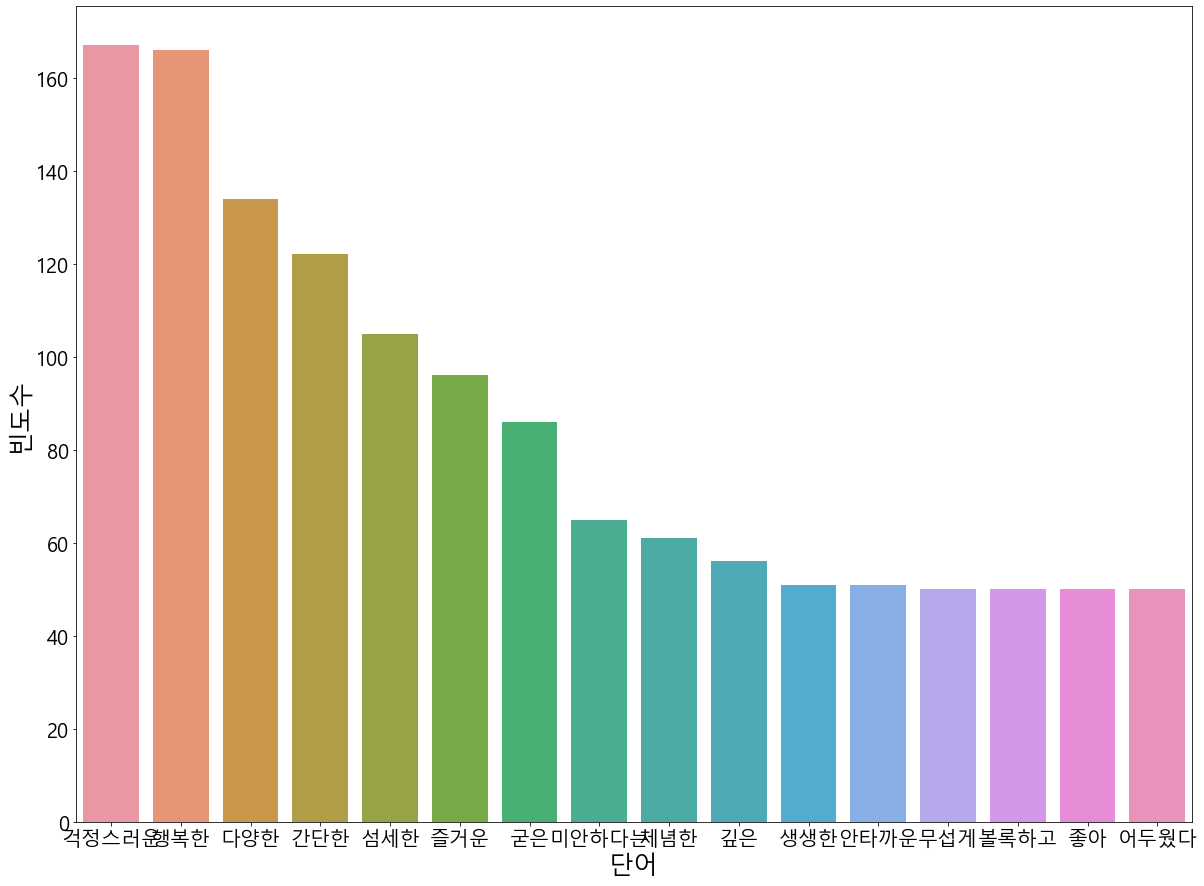

In [33]:
plt.figure(figsize=(20,15))
plt.rc('font', size=20)
ax = plt.plot()
ax = sns.barplot(x='단어',y='빈도수', data=df2[df2['빈도수']>=50])

ax.set_xlabel('단어', size = 25)  # x축 이름 설정
ax.set_ylabel('빈도수', size = 25) # y축 이름 설정
ax.set_title('', size = 30)

### 빈도수 트리맵 차트

In [ ]:
import squarify

plt.figure(figsize=(20,15))
plt.rc('font', size=20)
color=['#D21E26','#1462A7','#E39120','#1462A7','gray','#E39120','#E39120','#D21E26','#D21E26',
       '#D21E26','gray','#D21E26','#E39120']

#squarify.plot(sizes=df_13['빈도수'], label = df_13['단어'], value = df_13['빈도수'], color=color)

squarify.plot(sizes=df2['빈도수'], label = df2['단어'], text_kwargs={'color':'white', 'size':25}, 
              value = df2['빈도수'], color=color)

# 긍부정어

In [ ]:
import pandas as pd
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import json
import pandas as pd


SentiWord = pd.read_json('./data/SentiWord_info.json',encoding='utf-8')
SentiWord


def neg_pos(word):
    temp = pd.DataFrame()
    global SentiWord
    temp = SentiWord[(SentiWord['word'] == word) | (SentiWord['word_root'] == word)]
    try:
        word_tul = (word, temp['polarity'][temp.index[0]])
    except IndexError:
        word_tul = (word,0)
    return word_tul


res    ############################# 이건 워드클라우드 부분 검색어를 바꾸면 바뀜


from tqdm import tqdm

neg_lst = []
pos_lst = []
unkwon_lst = []
for df_word in tqdm(res,'긍/부정어를 나누고 있습니다.'):
    result = neg_pos(df_word)
    
    if result[1] > 0:
        pos_lst.append(result[0])
    elif result[1] < 0:
        neg_lst.append(result[0])
    elif result[1] == 0:
        unkwon_lst.append(result[0])
        
        
print('긍정키워드 수:',len(pos_lst),'개')
print('부정키워드 수:',len(neg_lst),'개')
print('중립 or unkwon 키워드 수:',len(unkwon_lst),'개')


from collections import Counter     # jdk에서 제공하는 라이브러리
pos_count= dict(Counter(pos_lst).most_common())   # 내림차순 정렬
# pos_count
neg_count= dict(Counter(neg_lst).most_common())
unkwon_count= dict(Counter(unkwon_lst).most_common())



pos_lst = []
neg_lst = []
unkwon_lst = []

for df_word in tqdm(res,'긍/부정어를 나누고 있습니다.'):
    result = neg_pos(df_word)
    if result[1] > 0:
        pos_lst.append(result[0])
    elif result[1] < 0:
        neg_lst.append(result[0])
    elif result[1] == 0:
        unkwon_lst.append(result[0])
        
        
print('긍정키워드 수:',len(pos_lst),'개')
print('부정키워드 수:',len(neg_lst),'개')
print('중립 or unkwon 키워드 수:',len(unkwon_lst),'개')




from wordcloud import WordCloud
import numpy as np
from PIL import Image
import random


############################ 긍정어 ######################################
img_path = './data/good.jpg'
cloud_mask = np.array(Image.open(img_path))

def color_func(**kwargs):
    color = '#393cc6' # https://www.w3schools.com/colors/colors_hexadecimal.asp
    return color


wordcloud = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf",
                      background_color="white", mask=cloud_mask)
wc = wordcloud.generate_from_frequencies(pos_count)

plt.figure(figsize=(10,15))
plt.imshow(wc.recolor(color_func=color_func), interpolation='bilinear')
plt.axis("off")
plt.show()



################################## 부정어 ################################
img_path = './data/bad.jpg'
cloud_mask = np.array(Image.open(img_path))

def color_func(**kwargs):
    color = '#d42b2b' # https://www.w3schools.com/colors/colors_hexadecimal.asp
    return color

wordcloud = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf",
                      background_color="white", mask=cloud_mask)
wc = wordcloud.generate_from_frequencies(neg_count)

plt.figure(figsize=(10,15))
plt.imshow(wc.recolor(color_func=color_func), interpolation='bilinear')
plt.axis("off")
plt.show()